In [1]:
import pandas as pd
import numpy as np
import re
import time
import seaborn as sns

start = time.time()

df = pd.read_csv('cars.csv', low_memory=False)
pd.set_option('display.max_columns', 234)

In [2]:
df = df.transpose()

In [3]:
df.shape

(32316, 234)

In [4]:
df.head(3)

,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,EPA Classification,Base Curb Weight (lbs),Front Hip Room (in),Front Leg Room (in),Second Shoulder Room (in),Passenger Volume (ft³),Second Head Room (in),Front Shoulder Room (in),Second Hip Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),Min Ground Clearance (in),"Track Width, Front (in)","Width, Max w/o mirrors (in)","Track Width, Rear (in)","Height, Overall (in)",Cargo Volume to Seat 1 (ft³),Cargo Volume to Seat 2 (ft³),Cargo Volume to Seat 3 (ft³),"Fuel Tank Capacity, Approx (gal)",Fuel Economy Est-Combined (MPG),EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),Engine Order Code,SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Sixth Gear Ratio (:1),Trans Description Cont.,Fourth Gear Ratio (:1),Seventh Gear Ratio (:1),Trans Order Code,Second Gear Ratio (:1),Reverse Ratio (:1),Trans Description Cont. Again,Fifth Gear Ratio (:1),Eighth Gear Ratio (:1),Trans Type,Third Gear Ratio (:1),Final Drive Axle Ratio (:1),Brake Type,Rear Brake Rotor Diam x Thickness (in),Disc - Rear (Yes or ),Brake ABS System,Drum - Rear (Yes or ),Front Brake Rotor Diam x Thickness (in),Disc - Front (Yes or ),Rear Drum Diam x Width (in),Steering Type,Turning Diameter - Curb to Curb (ft),Front Tire Order Code,Spare Tire Size,Front Tire Size,Rear Tire Order Code,Rear Tire Size,Spare Tire Order Code,Front Wheel Size (in),Spare Wheel Material,Front Wheel Material,Rear Wheel Size (in),Rear Wheel Material,Spare Wheel Size (in),Suspension Type - Front,Suspension Type - Rear (Cont.),Suspension Type - Rear,Suspension Type - Front (Cont.),Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Maximum Alternator Capacity (amps),Cold Cranking Amps @ 0° F (Primary),Wt Distributing Hitch - Max Tongue Wt. (lbs),Dead Weight Hitch - Max Tongue Wt. (lbs),Maximum Trailering Capacity (lbs),Wt Distributing Hitch - Max Trailer Wt. (lbs),Dead Weight Hitch - Max Trailer Wt. (lbs),Liftover Height (in),Rear Door Opening Height (in),Rear Door Opening Width (in),"Length, Overall (in)",Cargo Box Width @ Wheelhousings (in),Cargo Area Length @ Floor to Seat 3 (in),Cargo Area Length @ Floor to Seat 1 (in),Cargo Box (Area) Height (in),Cargo Area Width @ Beltline (in),Cargo Area Length @ Floor to Seat 2 (in),Clutch Size (in),Turning Diameter - Wall to Wall (ft),Lock to Lock Turns (Steering),"Steering Ratio (:1), Overall",Shock Absorber Diameter - Front (mm),Stabilizer Bar Diameter - Rear (in),Shock Absorber Diameter - Rear (mm),Stabilizer Bar Diameter - Front (in),Total Cooling System Capacity (qts),Third Shoulder Room (in),Third Head Room (in),Third Hip Room (in),Third Leg Room (in),Hybrid/Electric Components Miles/km,Hybrid/Electric Components Years,"Transfer Case Gear Ratio (:1), High","Transfer Case Gear Ratio (:1), Low",Trunk Volume (ft³),Number of Passenger Doors,Roadside Assistance Note,Warranty Note,Maintenance Miles/km,Maintenance Years,Basic Note,Cargo Volume with Rear Seat Up (ft³),Cargo Volume with Rear Seat Down (ft³),Gross Vehicle Weight Rating Cap (lbs),Engine Oil Cooler,Transfer Case Model,Transfer Case Power Take Off,Trans PTO Access,Brake ABS System (Second Line),Axle Type - Rear,Axle Type - Front,Cold Cranking Amps @ 0° F (2nd),EPA MPG Equivalent - Combined,Battery Range (mi),Axle Ratio (:1) - Rear,Axle Ratio (:1) - Front,Gross Axle Wt Rating - Front (lbs),Gross Axle Wt Rating - Rear (lb

In [5]:
# df.get_dtype_counts

In [6]:
df = df.reset_index()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32316 entries, 0 to 32315
Columns: 235 entries, index to Hybrid/Electric Components Note
dtypes: object(235)
memory usage: 57.9+ MB


In [8]:
# df.describe()

## Removing Extraneous Data


**Columns with 100% missing values**

These columns contain no information and are removed from the dataset in the code below.



In [9]:
# Removing columns with 100% missing values
df = df.dropna(how='all', axis=1)
print('The size of the dataset: ' + str(df.shape))

The size of the dataset: (32316, 231)


### Remove duplicates

In [10]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 32315
Columns: 231 entries, index to Hybrid/Electric Components Note
dtypes: object(231)
memory usage: 57.2+ MB


### Remove columns with only one unique value

In [11]:
# removing columns with only one unique value , args=(False)

df = df.loc[:,df.apply(func=pd.Series.nunique) > 1]

print('The size of the removed dataset: ', df.shape)

The size of the removed dataset:  (32316, 228)


# Prepare target column
It has missing values. Drop the those rows from dataset. Remove $ sign and ','.

In [12]:
df = df[df['MSRP'].notnull()]
print(df.shape)

(32262, 228)


In [13]:
df.loc[:, 'MSRP'] = df.loc[:, 'MSRP'].apply(lambda x: x.replace('$', '').replace(',', ''))
df['MSRP'] = pd.to_numeric(df['MSRP'], errors='coerce')
df['MSRP'].head()

0    40600
1    45500
2    43600
3    37400
4    42600
Name: MSRP, dtype: int64

### Extract Year and Model from one column

In [14]:
df['Year'] = df['index'].str[:4]

In [15]:
df['Year'].dtype

dtype('O')

In [16]:
df['Year'] = df['Year'].astype('category')
df['Year'].dtype

category

In [17]:
df['Specs'] = df['index'].str[5:]


In [18]:
df.tail(3)

,index,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,EPA Classification,Base Curb Weight (lbs),Front Hip Room (in),Front Leg Room (in),Second Shoulder Room (in),Passenger Volume (ft³),Second Head Room (in),Front Shoulder Room (in),Second Hip Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),Min Ground Clearance (in),"Track Width, Front (in)","Width, Max w/o mirrors (in)","Track Width, Rear (in)","Height, Overall (in)",Cargo Volume to Seat 1 (ft³),Cargo Volume to Seat 2 (ft³),Cargo Volume to Seat 3 (ft³),"Fuel Tank Capacity, Approx (gal)",Fuel Economy Est-Combined (MPG),EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),Engine Order Code,SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Sixth Gear Ratio (:1),Trans Description Cont.,Fourth Gear Ratio (:1),Seventh Gear Ratio (:1),Trans Order Code,Second Gear Ratio (:1),Reverse Ratio (:1),Trans Description Cont. Again,Fifth Gear Ratio (:1),Eighth Gear Ratio (:1),Trans Type,Third Gear Ratio (:1),Final Drive Axle Ratio (:1),Brake Type,Rear Brake Rotor Diam x Thickness (in),Brake ABS System,Drum - Rear (Yes or ),Front Brake Rotor Diam x Thickness (in),Disc - Front (Yes or ),Rear Drum Diam x Width (in),Steering Type,Turning Diameter - Curb to Curb (ft),Front Tire Order Code,Spare Tire Size,Front Tire Size,Rear Tire Order Code,Rear Tire Size,Spare Tire Order Code,Front Wheel Size (in),Spare Wheel Material,Front Wheel Material,Rear Wheel Size (in),Rear Wheel Material,Spare Wheel Size (in),Suspension Type - Front,Suspension Type - Rear (Cont.),Suspension Type - Rear,Suspension Type - Front (Cont.),Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Maximum Alternator Capacity (amps),Cold Cranking Amps @ 0° F (Primary),Wt Distributing Hitch - Max Tongue Wt. (lbs),Dead Weight Hitch - Max Tongue Wt. (lbs),Maximum Trailering Capacity (lbs),Wt Distributing Hitch - Max Trailer Wt. (lbs),Dead Weight Hitch - Max Trailer Wt. (lbs),Liftover Height (in),Rear Door Opening Height (in),Rear Door Opening Width (in),"Length, Overall (in)",Cargo Box Width @ Wheelhousings (in),Cargo Area Length @ Floor to Seat 3 (in),Cargo Area Length @ Floor to Seat 1 (in),Cargo Box (Area) Height (in),Cargo Area Width @ Beltline (in),Cargo Area Length @ Floor to Seat 2 (in),Clutch Size (in),Turning Diameter - Wall to Wall (ft),Lock to Lock Turns (Steering),"Steering Ratio (:1), Overall",Shock Absorber Diameter - Front (mm),Stabilizer Bar Diameter - Rear (in),Shock Absorber Diameter - Rear (mm),Stabilizer Bar Diameter - Front (in),Total Cooling System Capacity (qts),Third Shoulder Room (in),Third Head Room (in),Third Hip Room (in),Third Leg Room (in),Hybrid/Electric Components Miles/km,Hybrid/Electric Components Years,"Transfer Case Gear Ratio (:1), High","Transfer Case Gear Ratio (:1), Low",Trunk Volume (ft³),Number of Passenger Doors,Roadside Assistance Note,Warranty Note,Maintenance Miles/km,Maintenance Years,Basic Note,Cargo Volume with Rear Seat Up (ft³),Cargo Volume with Rear Seat Down (ft³),Gross Vehicle Weight Rating Cap (lbs),Engine Oil Cooler,Transfer Case Model,Transfer Case Power Take Off,Trans PTO Access,Axle Type - Rear,Axle Type - Front,Cold Cranking Amps @ 0° F (2nd),EPA MPG Equivalent - Combined,Battery Range (mi),Axle Ratio (:1) - Rear,Axle Ratio (:1) - Front,Gross Axle Wt Rating - Front (lbs),Gross Axle Wt Rating - Rear (lbs),EPA MPG Equivalent - City,EPA MPG Equivalent

In [19]:
df['Specs'][0]

'Acura RDX Specs: FWD w/Technology Pkg'

In [20]:
# split into two columns but choose only one
new = df['Specs'].str.split(' Specs: ', n = 1, expand = True)
df['Model'] = new[0]

### Size and Volume data cleaning

In [21]:
df['Volume'] = df['Cargo Volume (ft³)']
df['Width'] = df['Width, Max w/o mirrors (in)']
df['Height'] = df['Height, Overall (in)']
df['Length'] = df['Length, Overall (in)']

size_list = ['Volume', 'Width', 'Height', 'Length']

In [22]:
# Check non-null
df[size_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 4 columns):
Volume    7522 non-null object
Width     30212 non-null object
Height    30230 non-null object
Length    17486 non-null object
dtypes: object(4)
memory usage: 2.5+ MB


In [23]:
def to_float(col_list):
    for col in col_list:
    # df[col] = df[col].fillna('')
        df.loc[:, col] = pd.to_numeric(df.loc[:, col], errors='coerce')

In [24]:
to_float(size_list)

In [25]:
# Additional column for average of 3 dimensions
df['Size_avg'] = df[['Width', 'Length', 'Height']].sum(axis=1) / 3

# final for features
size_list = ['Volume', 'Width','Height','Length', 'Size_avg']

In [26]:
df[size_list].head()

,Volume,Width,Height,Length,Size_avg
0,NaN,74.8,65.7,NaN,46.833333
1,NaN,74.8,65.7,NaN,46.833333
2,NaN,74.8,65.7,NaN,46.833333
3,NaN,74.8,65.7,NaN,46.833333
4,NaN,74.8,65.7,NaN,46.833333


### Weight data cleaning

In [27]:
weight_list_short = [
 'Base Curb Weight (lbs)',
 'Gross Combined Wt Rating (lbs)',    
 'Maximum Trailering Capacity (lbs)',
 'Gross Vehicle Weight Rating Cap (lbs)'
]

In [28]:
df['Weight'] = df['Base Curb Weight (lbs)']
df['Trailer_cpt'] = df['Maximum Trailering Capacity (lbs)']

In [29]:
# df = df.drop(['Gross Combined Wt Rating (lbs)', 'Maximum Trailering Capacity (lbs)'], axis=1)

In [30]:
weight_list_short = ['Weight', 'Trailer_cpt']

In [31]:
to_float(weight_list_short)

In [32]:
# update list for features
weight_list = ['Weight', 'Trailer_cpt']

# examine data
df[weight_list].head()

,Weight,Trailer_cpt
0,3790.0,NaN
1,3829.0,NaN
2,3821.0,NaN
3,3783.0,NaN
4,4026.0,NaN


### Fuel data cleaning

In [33]:
fuel_economy_list_short = [
 'Fuel Tank Capacity, Approx (gal)',
 'Fuel Economy Est-Combined (MPG)',
 'EPA Fuel Economy Est - City (MPG)',
 'EPA Fuel Economy Est - Hwy (MPG)'
]

In [34]:
df['Fuel_Tank_Cpt'] = df['Fuel Tank Capacity, Approx (gal)']
df['MPG_avg'] = df['Fuel Economy Est-Combined (MPG)']
df['MPG_City'] = df['EPA Fuel Economy Est - City (MPG)']
df['MPG_Hwy'] = df['EPA Fuel Economy Est - Hwy (MPG)']

fuel_economy_list_short =['Fuel_Tank_Cpt', 'MPG_avg', 'MPG_City', 'MPG_Hwy']
                    

In [35]:
# extract numeric data
def clean(col):
    df[col] = df[col].fillna('')
    df[col] = df[col].apply(lambda x: x[:2] if r'(' in x else x)

clean('MPG_avg')
clean('MPG_City')
clean('MPG_Hwy')

to_float(fuel_economy_list_short)

In [36]:
# update list to be used as features
fuel_economy_list =['Fuel_Tank_Cpt', 'MPG_avg', 'MPG_City', 'MPG_Hwy']

# examine cleaned data
df[fuel_economy_list].head()

,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy
0,17.1,24.0,22.0,28.0
1,17.1,24.0,22.0,28.0
2,17.1,24.0,22.0,27.0
3,17.1,24.0,22.0,28.0
4,17.1,23.0,21.0,27.0


# Transmission data cleaning

In [37]:
trans_list = [
 'Trans Description Cont.',
 'Trans Order Code',
 'Trans Description Cont. Again',
 'Trans Type',
 'Trans PTO Access',
 'Transmission',
 'Trans Power Take Off']

In [38]:
df['Trans_Speed'] = df['Trans Type']

In [39]:
# to numeric values
trans_list_to_float = ['Trans_Speed']
to_float(trans_list_to_float)

In [40]:
# update list to be used as features
trans_list = ['Trans_Speed']

# examine cleaned data
df[trans_list].head()

,Trans_Speed
0,10.0
1,10.0
2,10.0
3,10.0
4,10.0


## Safety data cleaning

In [41]:
safety_list = [
 'Air Bag-Frontal-Driver',
 'Air Bag-Frontal-Passenger',
 'Air Bag-Passenger Switch (On/Off)',
 'Air Bag-Side Body-Front',
 'Air Bag-Side Body-Rear',
 'Air Bag-Side Head-Front',
 'Air Bag-Side Head-Rear',
 'Child Safety Rear Door Locks',
 'Daytime Running Lights',
 'Traction Control',
 'Night Vision',
 'Rollover Protection Bars',
 'Fog Lamps',
 'Parking Aid',
 'Tire Pressure Monitor',
 'Back-Up Camera',
 'Stability Control'
]

In [42]:
# safety_list dictionary for renaming purpose
dict1 = {'Air Bag-Frontal-Driver': 'Airbag_Front_Driver',
 'Air Bag-Frontal-Passenger': 'Airbag_Front_Psg',
 'Air Bag-Passenger Switch (On/Off)':'Airbag_Psg_Switch',
 'Air Bag-Side Body-Front': 'Airbag_SBF',
 'Air Bag-Side Body-Rear': 'Airbag_SBR',
 'Air Bag-Side Head-Front': 'Airbag_SHF',
 'Air Bag-Side Head-Rear': 'Airbag_SHR',
 'Child Safety Rear Door Locks': 'Child_Door_Locks',
 'Daytime Running Lights': 'Day_Lights',
 'Traction Control': 'Trac_Control',
 'Night Vision': 'Night_Vision',
 'Rollover Protection Bars': 'Rollover_Prt',
 'Fog Lamps': 'Fog_Lamps','Parking Aid': 'Parking_Aid',
 'Tire Pressure Monitor': 'Tire_P_Monitor',
 'Back-Up Camera': 'Backup_Camera',
 'Stability Control': 'Stability_Ctl'}

In [43]:
# function to update a list after renaming some columns
def update_list_by_dict(col_list, dict):
    for x in col_list:
        if x in list(dict.keys()):
            index = col_list.index(x)
            col_list[index] = dict[x]

update_list_by_dict(safety_list, dict1)            

In [44]:
# rename column name
df.rename(columns=dict1, inplace=True)

df['Num_safety'] = (df[safety_list]=='Yes').T.sum()
safety_list.append('Num_safety')

In [45]:
# examine cleaned data
df[safety_list].head()

,Airbag_Front_Driver,Airbag_Front_Psg,Airbag_Psg_Switch,Airbag_SBF,Airbag_SBR,Airbag_SHF,Airbag_SHR,Child_Door_Locks,Day_Lights,Trac_Control,Night_Vision,Rollover_Prt,Fog_Lamps,Parking_Aid,Tire_P_Monitor,Backup_Camera,Stability_Ctl,Num_safety
0,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12
1,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13
2,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13
3,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,11
4,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12


## Brake data cleaning - remove

In [46]:
brake_list = [
 'Drum - Rear (Yes or   )',                         
 'Disc - Front (Yes or   )',                           
 'Brake Type',
 'Brake ABS System'
]

In [47]:
df[brake_list][:3]

,Drum - Rear (Yes or ),Disc - Front (Yes or ),Brake Type,Brake ABS System
0,NaN,Yes,4-Wheel Disc,4-Wheel
1,NaN,Yes,4-Wheel Disc,4-Wheel
2,NaN,Yes,4-Wheel Disc,4-Wheel


In [48]:
# not to used for now
brake_list =[]

## Gear ratio data cleaning. It doesn't seem to be important!

In [49]:
gear_ratio_list = [
 'First Gear Ratio (:1)',
 'Second Gear Ratio (:1)',
 'Third Gear Ratio (:1)',
 'Fourth Gear Ratio (:1)',
 'Fifth Gear Ratio (:1)',
 'Sixth Gear Ratio (:1)',
 'Seventh Gear Ratio (:1)',
 'Eighth Gear Ratio (:1)',
 'Ninth Gear Ratio (:1)',
 'Tenth Gear Ratio (:1)',
 'Final Drive Axle Ratio (:1)',
 'Reverse Ratio (:1)',
]

In [50]:
# not to be used for now
gear_ratio_list = []

## Suspension data cleaning

In [51]:
suspension_list = [
 'Suspension Type - Front',
 'Suspension Type - Front (Cont.)',
 'Suspension Type - Rear',
 'Suspension Type - Rear (Cont.)'
]

In [52]:
# suspension_list
dict = {'Suspension Type - Front': 'Susp_Front',
 'Suspension Type - Front (Cont.)': 'Susp_Front2',
 'Suspension Type - Rear': 'Susp_Rear',
 'Suspension Type - Rear (Cont.)': 'Susp_Rear2'}

# rename column name
df.rename(columns=dict, inplace=True)

# update column list
update_list_by_dict(suspension_list, dict)

## Axle data cleaning - removed

In [53]:
axle_list = [
 'Axle Type - Rear',
 'Axle Type - Front',
 'Axle Ratio (:1) - Rear',
 'Axle Ratio (:1) - Front'
]

In [54]:
# not being used
axle_list = []

## Battery data cleaning

In [55]:
battery_list = [
 'Battery Range (mi)',
 'Cold Cranking Amps @ 0° F (Primary)',
 'Cold Cranking Amps @ 0° F (2nd)'
]

In [56]:
df['Battery_Amps'] = df['Cold Cranking Amps @ 0° F (Primary)']
df = df.drop(['Cold Cranking Amps @ 0° F (Primary)'], axis=1)

In [57]:
# to numeric value
battery_list_to_float = ['Battery_Amps']
to_float(battery_list_to_float)

In [58]:
# update for features
battery_list =['Battery_Amps']

# examin cleaned data
df[battery_list].head()

,Battery_Amps
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


## Engine data cleaning

In [59]:
engine_list = [
 'Engine Type',                           
 'Engine Order Code',                           
 'SAE Net Torque @ RPM',
 'SAE Net Horsepower @ RPM',
 'Displacement',    
 'Engine',    
 'Engine Oil Cooler'
]

df['HP1'] = df['SAE Net Torque @ RPM']
df['HP2'] = df['SAE Net Horsepower @ RPM']
df['Engine_Type'] = df['Engine Type']

df = df.drop(['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM', 'Engine Type'], axis=1)

engine_list = ['HP1', 'HP2', 'Engine_Type']

How to make the following code to work?

In [60]:
# def clean_engine(col):
#    df[col] = df[col].fillna('')
#    df[col] = df[col].apply(lambda x: x[:3] if r'\@' in x else x)
#    df[col] = pd.to_numeric(df[col], errors='coerse')
# clean_engine('HP1')    

In [61]:
# extract from extraneous characters
df['HP1'] = df['HP1'].str.replace(r' @ \d*', '')
df['HP1'] = df['HP1'].str.replace(r' - \d*', '')
df['HP2'] = df['HP2'].str.replace(r' @ \d*', '')
df['HP2'] = df['HP2'].str.replace(r' - \d*', '')

# conver to numeric
df['HP1'] = pd.to_numeric(df['HP1'], errors='coerse')
df['HP2'] = pd.to_numeric(df['HP2'], errors='coerse')

In [62]:
# examine cleaned data
df[engine_list].head()

,HP1,HP2,Engine_Type
0,280.0,272.0,Turbo Premium Unleaded I-4
1,280.0,272.0,Turbo Premium Unleaded I-4
2,280.0,272.0,Turbo Premium Unleaded I-4
3,280.0,272.0,Turbo Premium Unleaded I-4
4,280.0,272.0,Turbo Premium Unleaded I-4


### Clean up column 'Displacement'
#### Detect empty cells or NaN

In [63]:
print('Number of missing entries:', df['Displacement'].isnull().sum())

Number of missing entries: 2137


#### Fill missing data with empty string to avoid error during cleaning operations.

In [64]:
df['Displacement'] = df['Displacement'].fillna('')
print('Number of missing entries:', df['Displacement'].isnull().sum())

Number of missing entries: 0


#### Examine the data

In [65]:
df['Displacement'][:5]

0    2.0 L/122
1    2.0 L/122
2    2.0 L/122
3    2.0 L/122
4    2.0 L/122
Name: Displacement, dtype: object

#### replace 'L/...' and strip white spaces right and left

In [66]:
df['Displacement'] = df['Displacement'].apply(lambda x: x.split('L')[0] if 'L' in x else x)

In [67]:
# examine cleaned data
df['Displacement'][:4]

0    2.0 
1    2.0 
2    2.0 
3    2.0 
Name: Displacement, dtype: object

#### The above shows data are not aligned, indicating white space existing.
#### Strip leading and trailing white space

In [68]:
df['Displacement'] = df['Displacement'].str.strip()

#### Export to csv file and scroll using Excel. Found many dirty data.

In [69]:
with open('Displacement.csv','w') as f:
    df['Displacement'].to_csv(f, header=True)

#### Use len() to list out other data to be cleaned.

In [70]:
len_mask = df['Displacement'].apply(lambda x: True if len(x) >3 else False)
disp = df['Displacement'][len_mask]
disp[:7]

1443    2.5/151
1448    2.5/151
1546    4.0/243
1658       6.75
1659       6.75
1660       6.75
1661       6.75
Name: Displacement, dtype: object

#### Romove '/xx'

In [71]:
df['Displacement'] = df['Displacement'].apply(lambda x: x.split('/')[0] if '/' in x else x)

len_mask = df['Displacement'].apply(lambda x: True if len(x) >3 else False)
df['Displacement'][len_mask]

1658                           6.75
1659                           6.75
1660                           6.75
1661                           6.75
1679                           6.75
1680                           6.75
1681                           6.75
2339                        - TBD -
2389                      2.5 (152)
2391                      2.5 (152)
2392                      2.5 (152)
2396                      2.5 (152)
2399                      2.5 (152)
2401                      2.5 (152)
2402                      2.5 (152)
2405                      2.5 (152)
2641     39.5 Cu.in. Range Extender
2642     39.5 Cu.in. Range Extender
2645     39.5 Cu.in. Range Extender
2646     39.5 Cu.in. Range Extender
2649     39.5 Cu.in. Range Extender
2651     39.5 Cu.in. Range Extender
2653     39.5 Cu.in. Range Extender
12108                          6.2l
12109                          6.2l
12141                          6.2l
12160                          6.2l
25833                       

In [72]:
df['Displacement'][2320:2345]

2326        2.0
2327        4.4
2328        3.0
2329        3.0
2330        4.4
2331        3.0
2332        4.4
2333        3.0
2334        4.4
2335        3.0
2336        3.0
2337        4.4
2338        3.0
2339    - TBD -
2340        3.0
2341        4.8
2342        3.0
2343        3.0
2344        3.0
2345        3.0
2346        3.0
2347        4.8
2348        3.0
2349        3.0
2350        3.0
Name: Displacement, dtype: object

### Remove ' (152)'

In [73]:
# df['Displacement'][2389:2406].apply(lambda x: x[:3])
# df['Displacement'][2389:2406].apply(str.replace(r' (152)', ''))
df['Displacement'] = df['Displacement'].apply(lambda x: x[:3] if '152' in x else x)

In [74]:
df['Displacement'][2389:2406]

2395    3.0
2396    2.5
2397    4.4
2398    3.0
2399    2.5
2400    4.4
2401    2.5
2402    2.5
2403    4.4
2404    3.0
2405    2.5
2406    5.0
2407    4.4
2408    3.0
2409    4.4
2410    2.8
2411    4.4
Name: Displacement, dtype: object

In [75]:
# idx = []
# def get_idx(x):
#     if len(x) > 10:
#         idx.append(x.index)
#     return idx
# idx = df['Displacement'].apply(get_idx)
# df.loc[idx, 'Displacement']


cub_inch_cells = df['Displacement'].apply(lambda x: True if len(x) >10 else False)
df['Displacement'][cub_inch_cells]

2641    39.5 Cu.in. Range Extender
2642    39.5 Cu.in. Range Extender
2645    39.5 Cu.in. Range Extender
2646    39.5 Cu.in. Range Extender
2649    39.5 Cu.in. Range Extender
2651    39.5 Cu.in. Range Extender
2653    39.5 Cu.in. Range Extender
Name: Displacement, dtype: object

### transform '39.5 Cu.in. Range Extender' to liter
calculate from cubit inch to liter:

In [76]:
df['Displacement'] = df['Displacement'].apply(lambda x: x[:4] if 'Cu.in.' in x else x)
df['Displacement'] = df['Displacement'].apply(lambda x: str(x).replace('l', '') if 'l' in x else x)

In [77]:
df['Displacement'] = pd.to_numeric(df['Displacement'], errors='coerce')

In [78]:
df['Displacement'][cub_inch_cells].index

idx_for_converting_units = df['Displacement'][cub_inch_cells].index

df.loc[idx_for_converting_units, ['Displacement']]

,Displacement
2641,39.5
2642,39.5
2645,39.5
2646,39.5
2649,39.5
2651,39.5
2653,39.5


In [79]:
# transform units
df.loc[idx_for_converting_units, 'Displacement'] = df.loc[idx_for_converting_units, 'Displacement'].apply(lambda x: x*0.016)

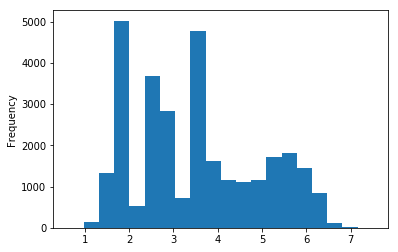

In [80]:
import matplotlib.pyplot as plt
df['Displacement'].plot('hist', bins=20)
plt.show()

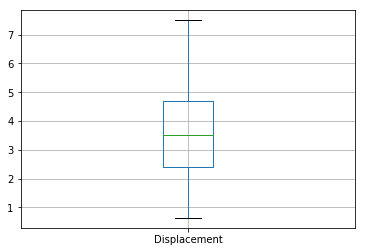

In [81]:
df.boxplot(column='Displacement')
plt.show()

In [82]:
# update for features
engine_list = ['HP1', 'HP2', 'Engine_Type', 'Displacement']

#exmaine cleaned data
df[engine_list].head()

,HP1,HP2,Engine_Type,Displacement
0,280.0,272.0,Turbo Premium Unleaded I-4,2.0
1,280.0,272.0,Turbo Premium Unleaded I-4,2.0
2,280.0,272.0,Turbo Premium Unleaded I-4,2.0
3,280.0,272.0,Turbo Premium Unleaded I-4,2.0
4,280.0,272.0,Turbo Premium Unleaded I-4,2.0


## Corrosion data cleaning

In [83]:
corrosion_list = [
 'Corrosion Miles/km',
 'Corrosion Years',
 'Corrosion Note']

df['Corrosion_Years'] = df['Corrosion Years']
df['Corrosion_Miles'] = df['Corrosion Miles/km']

df = df.drop(['Corrosion Years', 'Corrosion Miles/km'], axis=1)

In [84]:
# df['Corrosion Years'] = pd.to_numeric(df['Corrosion Years'], errors='coerse')

In [85]:
corrosion_list = ['Corrosion_Miles', 'Corrosion_Years']

In [86]:
df['Corrosion_Miles'] = df['Corrosion_Miles'].str.replace(',', '')


In [87]:
df['Corrosion_Miles'] = df['Corrosion_Miles'].str.replace('Unlimited', '300000')

In [88]:
df['Corrosion_Miles'] = pd.to_numeric(df['Corrosion_Miles'], errors='coerse')
df['Corrosion_Years'] = pd.to_numeric(df['Corrosion_Years'], errors='coerse') 

In [89]:
# used as features
corrosion_list = ['Corrosion_Miles', 'Corrosion_Years']

## Miscillaneous data cleaning

 drop non-essencial and repeated columns: 
 
 'Model', 'index',  'EPA Classification',  'Number of Passenger Doors',    'Rear Door Type', 'Front Tire Order Code',
 'Rear Tire Order Code',
 'Spare Tire Order Code',
 'Spare Wheel Material',
  'Roadside Assistance Note',
  'Lock to Lock Turns (Steering)',
 'Steering Ratio (:1), Overall',

 'Hybrid/Electric Components Miles/km',
 'Hybrid/Electric Components Years',
 'Hybrid/Electric Components Note',
    
 'Transfer Case Model',
 'Transfer Case Gear Ratio (:1), High',
 'Transfer Case Gear Ratio (:1), Low',
 'Transfer Case Power Take Off',

 'Warranty Note',                           
 'Basic Note',
 'Maintenance Note',
 
  'Emissions Miles/km',
 'Emissions Years',
 'Emissions Note',    
  'EPA Air Pollution Score', 51 counts
  ['Drivetrain Note'] 1135
  
  
 'Steering Type',
 'Steering Ratio (:1), On Center',
 'Steering Ratio (:1), At Lock',


 'Revolutions/Mile @ 45 mph - Spare',
 'Revolutions/Mile @ 45 mph - Front',
 'Revolutions/Mile @ 45 mph - Rear',

#### These two columns are the same. So remove one.

In [90]:
df[[ 'EPA Class', 'EPA Classification']].head()

,EPA Class,EPA Classification
0,Small Sport Utility Vehicles 2WD,Small Sport Utility Vehicles 2WD
1,Small Sport Utility Vehicles 2WD,Small Sport Utility Vehicles 2WD
2,Small Sport Utility Vehicles 2WD,Small Sport Utility Vehicles 2WD
3,Small Sport Utility Vehicles 2WD,Small Sport Utility Vehicles 2WD
4,Small Sport Utility Vehicles 4WD,Small Sport Utility Vehicles 4WD


In [91]:
miscil = [
 'Year',
 'Model',
 'Specs',
 'MSRP',
 'EPA Class',
 'Body Style',
 'Drivetrain',
 'Passenger Capacity',
 'Passenger Doors',
 'Front Wheel Material',
 'Rear Wheel Material',
 'Basic Miles/km',
 'Basic Years',    
 'Drivetrain Miles/km',
 'Drivetrain Years',
 'Roadside Assistance Miles/km',
 'Roadside Assistance Years',
 'Maximum Alternator Capacity (amps)',
 'Maintenance Miles/km',
 'Maintenance Years',
 'Maximum Alternator Watts',
 'Other Features']

In [92]:
 miscil_to_float_cols = ['Passenger Capacity', 
 'Passenger Doors', 
 'Basic Miles/km', 
 'Basic Years', 
 'Drivetrain Miles/km', 
 'Drivetrain Years', 
 'Roadside Assistance Miles/km', 
 'Roadside Assistance Years', 
 'Maximum Alternator Capacity (amps)', 
 'Maintenance Miles/km', 
 'Maintenance Years',  
 'Maximum Alternator Watts'] 

In [93]:
# clean columns
df['Basic Miles/km'] = df['Basic Miles/km'].str.replace(',', '')
df['Roadside Assistance Miles/km'] = df['Roadside Assistance Miles/km'].str.replace(',', '')
df['Maintenance Miles/km'] = df['Maintenance Miles/km'].str.replace(',', '')
df['Drivetrain Miles/km'] = df['Drivetrain Miles/km'].str.replace(',', '')

In [94]:
# convert to numeric values
to_float(miscil_to_float_cols)

In [95]:
dict = {   
 'EPA Class': 'EPA_Class',
 'Body Style': 'Body_Stype',
 'Front Wheel Material': 'Front_Wheel_Mat',
 'Rear Wheel Material': 'Rear_Wheel_Mat',
'Passenger Capacity': 'Psg_Cp',
'Passenger Doors': 'Psg_Doors',
'Basic Miles/km': 'Basic_Miles',
'Basic Years': 'Basic_Year',
'Drivetrain Miles/km': 'Drivetrain_Miles',
'Drivetrain Years': 'Drivetrain_Years',
'Roadside Assistance Miles/km': 'Road_Assist_Miles',
'Roadside Assistance Years': 'Road_Assist_Years',
'Maximum Alternator Capacity (amps)':'Max_Alt_Cp',
'Maintenance Miles/km': 'Maint_Miles',
'Maintenance Years': 'Maint_Year',
'Maximum Alternator Watts': 'Max_Alt_Watts',
'Other Features': 'Other_Features'}

In [96]:
# update column lists            
update_list_by_dict(miscil, dict )
update_list_by_dict(miscil_to_float_cols, dict)

In [97]:
# rename columns
df.rename(columns=dict, inplace=True)

In [98]:
# Put together all features
features = [miscil, weight_list, size_list, gear_ratio_list, safety_list, fuel_economy_list, brake_list, 
                suspension_list, trans_list, axle_list, battery_list, engine_list, corrosion_list]
all = []
for i in range(len(features)):
    all += features[i]


In [99]:
df[all]

,Year,Model,Specs,MSRP,EPA_Class,Body_Stype,Drivetrain,Psg_Cp,Psg_Doors,Front_Wheel_Mat,Rear_Wheel_Mat,Basic_Miles,Basic_Year,Drivetrain_Miles,Drivetrain_Years,Road_Assist_Miles,Road_Assist_Years,Max_Alt_Cp,Maint_Miles,Maint_Year,Max_Alt_Watts,Other_Features,Weight,Trailer_cpt,Volume,Width,Height,Length,Size_avg,Airbag_Front_Driver,Airbag_Front_Psg,Airbag_Psg_Switch,Airbag_SBF,Airbag_SBR,Airbag_SHF,Airbag_SHR,Child_Door_Locks,Day_Lights,Trac_Control,Night_Vision,Rollover_Prt,Fog_Lamps,Parking_Aid,Tire_P_Monitor,Backup_Camera,Stability_Ctl,Num_safety,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy,Susp_Front,Susp_Front2,Susp_Rear,Susp_Rear2,Trans_Speed,Battery_Amps,HP1,HP2,Engine_Type,Displacement,Corrosion_Miles,Corrosion_Years
0,2019,Acura RDX,Acura RDX Specs: FWD w/Technology Pkg,40600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3790.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
1,2019,Acura RDX,Acura RDX Specs: FWD w/Advance Pkg,45500,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3829.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
2,2019,Acura RDX,Acura RDX Specs: FWD w/A-Spec Pkg,43600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3821.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,24.0,22.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
3,2019,Acura RDX,Acura RDX Specs: FWD,37400,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3783.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,11,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
4,2019,Acura RDX,Acura RDX Specs: AWD w/Technology Pkg,42600,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,4026.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12,17.1,23.0,21.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
5,2019,Acura RDX,Acura RDX Specs: AWD w/Advance Pkg,47500,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,4068.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,23.0,21.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
6,2019,Acura RDX,Acura RDX Specs: AWD w/A-Spec Pkg,45600,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,4015.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,23.0,21.0,26.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,

In [100]:
df[all].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 63 columns):
Year                   32262 non-null category
Model                  32262 non-null object
Specs                  32262 non-null object
MSRP                   32262 non-null int64
EPA_Class              30286 non-null object
Body_Stype             30546 non-null object
Drivetrain             30546 non-null object
Psg_Cp                 32262 non-null int64
Psg_Doors              32262 non-null int64
Front_Wheel_Mat        30293 non-null object
Rear_Wheel_Mat         30293 non-null object
Basic_Miles            29879 non-null float64
Basic_Year             30145 non-null float64
Drivetrain_Miles       29076 non-null float64
Drivetrain_Years       29374 non-null float64
Road_Assist_Miles      19088 non-null float64
Road_Assist_Years      24632 non-null float64
Max_Alt_Cp             22714 non-null float64
Maint_Miles            5519 non-null float64
Maint_Year             5569 no

In [101]:
# tackle the index mismatch
df = df.reset_index()

In [102]:
df[all].to_csv('cars_cleaned.csv')

In [103]:
print(time.time()-start)

20.912818431854248


In [104]:
df[all]

,Year,Model,Specs,MSRP,EPA_Class,Body_Stype,Drivetrain,Psg_Cp,Psg_Doors,Front_Wheel_Mat,Rear_Wheel_Mat,Basic_Miles,Basic_Year,Drivetrain_Miles,Drivetrain_Years,Road_Assist_Miles,Road_Assist_Years,Max_Alt_Cp,Maint_Miles,Maint_Year,Max_Alt_Watts,Other_Features,Weight,Trailer_cpt,Volume,Width,Height,Length,Size_avg,Airbag_Front_Driver,Airbag_Front_Psg,Airbag_Psg_Switch,Airbag_SBF,Airbag_SBR,Airbag_SHF,Airbag_SHR,Child_Door_Locks,Day_Lights,Trac_Control,Night_Vision,Rollover_Prt,Fog_Lamps,Parking_Aid,Tire_P_Monitor,Backup_Camera,Stability_Ctl,Num_safety,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy,Susp_Front,Susp_Front2,Susp_Rear,Susp_Rear2,Trans_Speed,Battery_Amps,HP1,HP2,Engine_Type,Displacement,Corrosion_Miles,Corrosion_Years
0,2019,Acura RDX,Acura RDX Specs: FWD w/Technology Pkg,40600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3790.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
1,2019,Acura RDX,Acura RDX Specs: FWD w/Advance Pkg,45500,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3829.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
2,2019,Acura RDX,Acura RDX Specs: FWD w/A-Spec Pkg,43600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3821.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,24.0,22.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
3,2019,Acura RDX,Acura RDX Specs: FWD,37400,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3783.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,11,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
4,2019,Acura RDX,Acura RDX Specs: AWD w/Technology Pkg,42600,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,4026.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12,17.1,23.0,21.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
5,2019,Acura RDX,Acura RDX Specs: AWD w/Advance Pkg,47500,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,4068.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,23.0,21.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
6,2019,Acura RDX,Acura RDX Specs: AWD w/A-Spec Pkg,45600,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,4015.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,23.0,21.0,26.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,

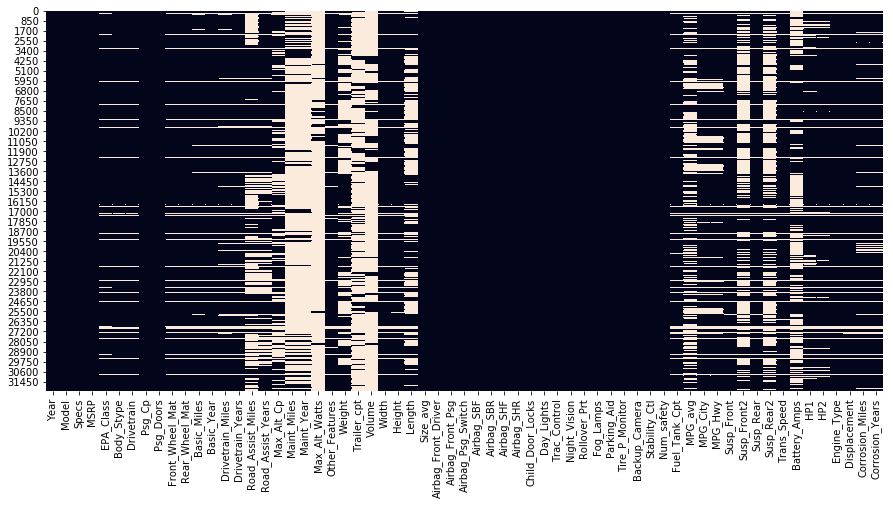

In [108]:
plt.figure(figsize=(15,7))
sns.heatmap(df[all].isnull(), cbar=False)
plt.savefig('missing_.png', bbox_inches="tight")
plt.show()

In [106]:
df['Model'].unique()

array(['Acura RDX', 'Acura MDX', 'Acura TLX', 'Acura ILX', 'Acura NSX',
       'Acura RLX', 'Alfa Romeo 4C', 'Alfa Romeo Giulia',
       'Alfa Romeo Stelvio Quadrifoglio', 'Alfa Romeo Stelvio',
       'Alfa Romeo 4C Spider', 'Aston Martin DB11', 'Aston Martin Vantage',
       'Aston Martin Vanquish', 'Aston Martin DBS', 'Audi A6', 'Audi A7',
       'Audi e-tron', 'Audi Q3', 'Audi Q8', 'Audi S3', 'Audi Q5',
       'Audi S7', 'Audi S4', 'Audi Q7', 'Audi A4', 'Audi S6', 'Audi A5',
       'Audi RS 5', 'Audi A3', 'Audi A5 Sportback', 'Audi SQ5',
       'Audi RS 3', 'Audi S5 Coupe', 'Audi A3 Sedan', 'Audi S5 Sportback',
       'Audi A4 allroad', 'Audi A3 Sportback e-tron', 'Audi A3 Cabriolet',
       'Audi S5 Cabriolet', 'Audi RS 7', 'Audi TT', 'Audi A8 L',
       'Audi S8 plus', 'Audi TT Coupe', 'Audi RS 5 Coupe', 'Audi TTS',
       'Audi RS 5 Sportback', 'Audi TT Roadster', 'Bentley Bentayga',
       'Bentley Continental GT', 'Bentley Flying Spur', 'Bentley Mulsanne',
       'BMW 3-Series'